In [33]:
import pandas as pd

path = "../intermediate/schedules_cleaned.csv"

df = pd.read_csv(path)
df.head()

,game_id,season,week,date,team,opponent,is_home,team_score,opp_score,team_win,...,must_win_proxy,point_diff_prior1,team_prob_novig,opp_prob_novig,rest_days,short_rest,bye_week,team_win_prev1,team_games_played_pre,team_losses_pre
0,2014_01_SD_ARI,2014,1,2014-09-08,ARI,SD,1,18,17,1,...,0,14.0,0.591679,0.408321,NaN,NaN,NaN,0,0,0
1,2014_02_ARI_NYG,2014,2,2014-09-14,ARI,NYG,0,25,14,1,...,0,8.0,0.478203,0.521797,6.0,1.0,0.0,1,1,0
2,2014_03_SF_ARI,2014,3,2014-09-21,ARI,SF,1,23,14,1,...,0,-1.0,0.413907,0.586093,7.0,0.0,0.0,1,2,0
3,2014_05_ARI_DEN,2014,5,2014-10-05,ARI,DEN,0,20,41,0,...,0,12.0,0.240964,0.759036,14.0,0.0,1.0,1,3,0
4,2014_06_WAS_ARI,2014,6,2014-10-12,ARI,WAS,1,30,20,1,...,0,25.0,0.680078,0.319922,7.0,0.0,0.0,0,4,1


In [34]:
leakage_cols = [
    # direct outcomes
    "home_score", "away_score", "team_score", "opp_score", 
    "point_diff", "Winner",

    # current team stats (not prior)
    "team_fga", "team_fgm", "team_first_down", "team_fumbles_lost",
    "team_pass_att", "team_pass_cmp", "team_pass_int",
    "team_pass_sacked", "team_pass_td", "team_pass_yds",
    "team_penalties", "team_penalties_yds",
    "team_plays_offense",
    "team_rush_att", "team_rush_td", "team_rush_yds",
    "team_turnovers",
    "team_xpa", "team_xpm",
    "team_punt", "team_punt_yds",
    "team_pass_sacked_yds",

    # current opponent stats (not prior)
    "opp_fga", "opp_fgm", "opp_first_down", "opp_fumbles_lost",
    "opp_pass_att", "opp_pass_cmp", "opp_pass_int",
    "opp_pass_sacked", "opp_pass_td", "opp_pass_yds",
    "opp_penalties", "opp_penalties_yds",
    "opp_plays_offense",
    "opp_rush_att", "opp_rush_td", "opp_rush_yds",
    "opp_turnovers",
    "opp_xpa", "opp_xpm",
    "opp_punt", "opp_punt_yds",
    "opp_pass_sacked_yds"
]

# drop leakage
df = df.drop(columns=leakage_cols, errors="ignore")

feature_drop = [
    "team_games_played_pre",

    "team_xpa_prior1", "team_xpm_prior1", "opp_xpa_prior1", "opp_xpm_prior1",
    "team_fgm_prior1", "opp_fgm_prior1", "team_penalties_yds_prior1", "opp_penalties_yds_prior1",

    "wind" #too messy for now
]


df = df.drop(columns=feature_drop, errors="ignore")

# list remaining columns
print("Remaining features:", df.columns.tolist())

#drop any target y values taht are missing
print("Missing team_moneyline:", df["team_moneyline"].isna().sum())
df = df.dropna(subset=["team_moneyline"]) # drop rows that are the y target value

Remaining features: ['game_id', 'season', 'week', 'date', 'team', 'opponent', 'is_home', 'team_win', 'home_team', 'away_team', 'spread_line', 'total_line', 'stadium', 'roof', 'surface', 'temp', 'game_type', 'weekday', 'gametime', 'location', 'referee', 'team_coach', 'team_moneyline', 'opp_coach', 'opp_moneyline', 'team_pass_att_prior1', 'team_pass_cmp_prior1', 'team_pass_yds_prior1', 'team_pass_td_prior1', 'team_pass_int_prior1', 'team_pass_sacked_prior1', 'team_rush_att_prior1', 'team_rush_yds_prior1', 'team_rush_td_prior1', 'team_first_down_prior1', 'team_turnovers_prior1', 'team_penalties_prior1', 'team_fga_prior1', 'team_plays_offense_prior1', 'team_score_prior1', 'opp_pass_att_prior1', 'opp_pass_cmp_prior1', 'opp_pass_yds_prior1', 'opp_pass_td_prior1', 'opp_pass_int_prior1', 'opp_pass_sacked_prior1', 'opp_rush_att_prior1', 'opp_rush_yds_prior1', 'opp_rush_td_prior1', 'opp_first_down_prior1', 'opp_turnovers_prior1', 'opp_penalties_prior1', 'opp_fga_prior1', 'opp_plays_offense_prior

In [35]:
#print to gold ml ready csv
df.to_csv("../gold/schedules_gold.csv", index=False)
print(df.head())

           game_id  season  week        date team opponent  is_home  team_win  \
0   2014_01_SD_ARI    2014     1  2014-09-08  ARI       SD        1         1   
1  2014_02_ARI_NYG    2014     2  2014-09-14  ARI      NYG        0         1   
2   2014_03_SF_ARI    2014     3  2014-09-21  ARI       SF        1         1   
3  2014_05_ARI_DEN    2014     5  2014-10-05  ARI      DEN        0         0   
4  2014_06_WAS_ARI    2014     6  2014-10-12  ARI      WAS        1         1   

  home_team away_team  ...  team_wins_pre  must_win_proxy point_diff_prior1  \
0       ARI        SD  ...              0               0              14.0   
1       NYG       ARI  ...              1               0               8.0   
2       ARI        SF  ...              2               0              -1.0   
3       DEN       ARI  ...              3               0              12.0   
4       ARI       WAS  ...              3               0              25.0   

  team_prob_novig opp_prob_novig  rest

Train Models to Try and Predict Team win probability, if there is a discreptency between predicted probablity and markett implied porobablitliilyt based on betting lines, place a simulated bet, and see how accurate over the past 10 years it has been.

Train seasons: [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Test season  : [2023]
Train/Test sizes: 4878/570
Dropped for non-numeric: []
Using 313 numeric features.
['is_home', 'temp', 'team_pass_att_prior1', 'team_pass_cmp_prior1', 'team_pass_yds_prior1', 'team_pass_td_prior1', 'team_pass_int_prior1', 'team_pass_sacked_prior1', 'team_rush_att_prior1', 'team_rush_yds_prior1', 'team_rush_td_prior1', 'team_first_down_prior1', 'team_turnovers_prior1', 'team_penalties_prior1', 'team_fga_prior1', 'team_plays_offense_prior1', 'team_score_prior1', 'opp_pass_att_prior1', 'opp_pass_cmp_prior1', 'opp_pass_yds_prior1', 'opp_pass_td_prior1', 'opp_pass_int_prior1', 'opp_pass_sacked_prior1', 'opp_rush_att_prior1', 'opp_rush_yds_prior1', 'opp_rush_td_prior1', 'opp_first_down_prior1', 'opp_turnovers_prior1', 'opp_penalties_prior1', 'opp_fga_prior1', 'opp_plays_offense_prior1', 'opp_score_prior1', 'team_pass_yds_roll3', 'team_rush_yds_roll3', 'team_pass_td_roll3', 'team_rush_td_roll3', 'team_

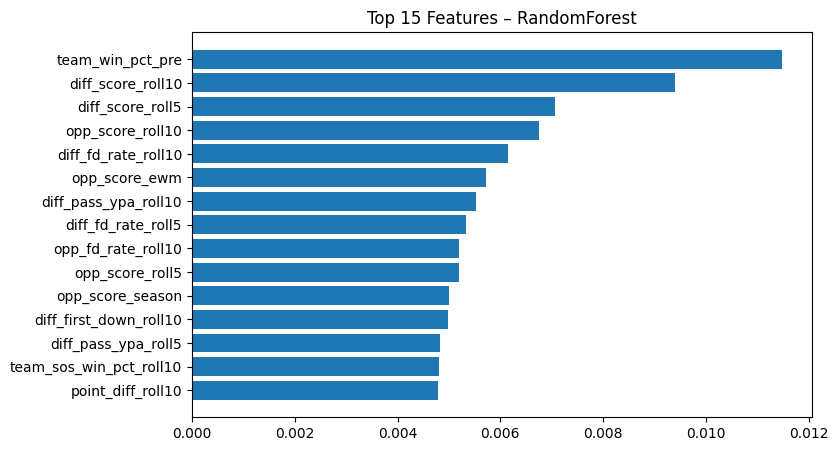


[XGBoost]
LogLoss: 0.7898 | AUC: 0.6048 | Brier: 0.2748 | Accuracy: 0.5842 | F1: 0.6096

Top 15 features for XGBoost:
diff_score_roll10              0.0144
team_win_pct_pre               0.0084
is_home                        0.0074
opp_pass_sacked_roll10         0.0065
diff_score_roll5               0.0058
team_point_diff_roll3          0.0057
is_home_x_temp                 0.0056
team_pass_td_prior1            0.0053
team_win_prev1                 0.0050
opp_first_down_roll10          0.0049
team_pass_sacked_prior1        0.0047
team_rush_td_roll5             0.0046
diff_first_down_roll5          0.0045
opp_pass_td_roll5              0.0045
opp_pass_sacked_roll3          0.0044

Bottom 5 features for XGBoost:
temp_bin_gt_80                 0.0000
extreme_cold                   0.0000
late_season                    0.0000
must_win_proxy                 0.0000
short_rest                     0.0000


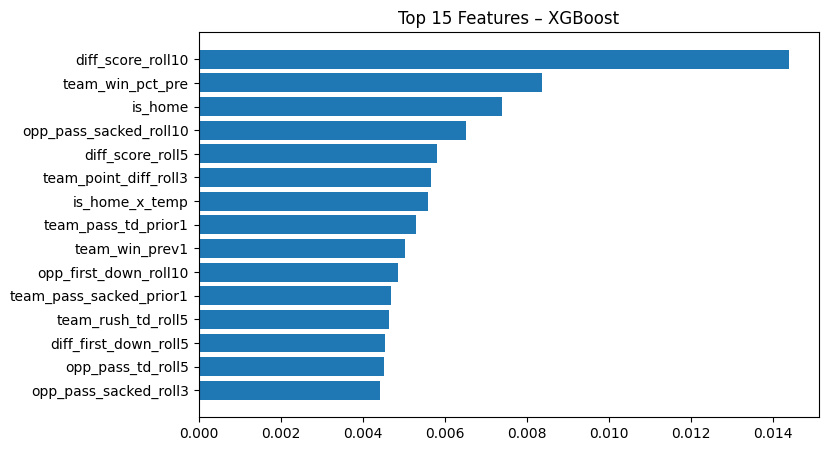


[RF (calibrated)]  LogLoss=0.6781  AUC=0.6125  Brier=0.2425  Acc=0.5754  F1=0.6676


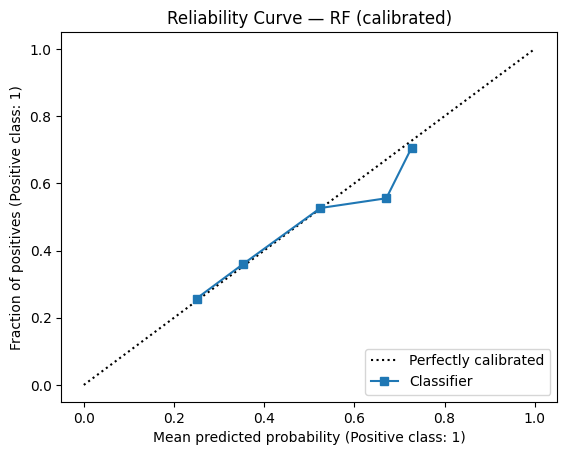


[XGB (calibrated)]  LogLoss=0.6736  AUC=0.6156  Brier=0.2407  Acc=0.5930  F1=0.6000


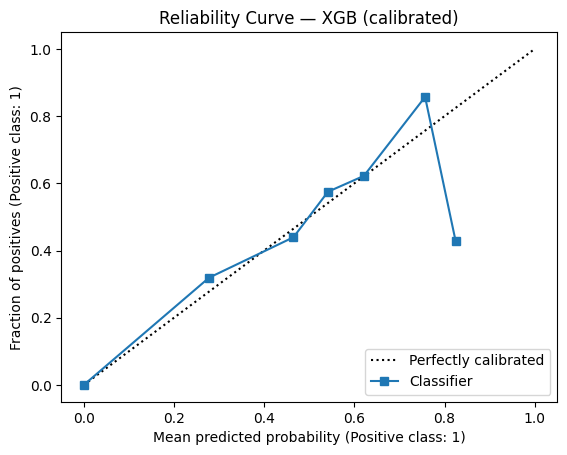


Bets placed: 242 | Total P&L: -13.07 | ROI/bet: -0.054 | Hit rate: 0.364 | Avg edge: 0.165

Bets placed: 215 | Total P&L: -6.98 | ROI/bet: -0.032 | Hit rate: 0.340 | Avg edge: 0.151

Top RF edges:
     season  week team opponent  team_moneyline  team_prob_novig   p_model  \
8      2023     9  ARI      CLE           525.0         0.153499  0.670659   
121    2023    17  CIN       KC           275.0         0.255931  0.670659   
334    2023    11   LV      MIA           700.0         0.120000  0.500000   
15     2023    17  ARI      PHI           525.0         0.153499  0.500000   
284    2023    18   KC      LAC           154.0         0.377533  0.720000   
1      2023     2  ARI      NYG           185.0         0.336352  0.670659   
477    2023    17  PIT      SEA           185.0         0.336352  0.670659   
2      2023     3  ARI      DAL           470.0         0.168350  0.500000   
389    2023    15   NE       KC           370.0         0.204224  0.529412   
517    2023     1   TB

In [36]:
# --- 0) Imports
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import log_loss, roc_auc_score, brier_score_loss

from sklearn.ensemble import RandomForestClassifier

# XGBoost (pip install xgboost if needed)
from xgboost import XGBClassifier

# --- 1) Basic hygiene: drop rows with missing target or market fields
need_cols = ["team_win", "team_moneyline", "team_prob_novig", "season"]
dfm = df.dropna(subset=need_cols).copy()

# Ensure binary target
dfm["team_win"] = dfm["team_win"].astype(int)

# --- 2) Time-based split: last season as test
last_season = dfm["season"].max()
train = dfm[dfm["season"] < last_season].copy()
test  = dfm[dfm["season"] == last_season].copy()

print(f"Train seasons: {sorted(train['season'].unique())}")
print(f"Test season  : {sorted(test['season'].unique())}")
print(f"Train/Test sizes: {len(train)}/{len(test)}")

# --- 3) Feature selection (numeric only; exclude IDs, text, market, and target)
drop_exact = {
    "team_win","team_prob_novig", "opp_prob_novig", "spread_line", "total_line", 
    "team_moneyline","opp_moneyline",  # target & market
    "game_id","team","opponent","home_team","away_team",
    "referee","team_coach","opp_coach","stadium","roof","surface","location",
    "weekday","gametime","game_type","date","Winner",
    "season", "week"# textual/meta not for baseline

}
num_cols = []
dropped_non_numeric = []

for c in dfm.columns:
    if c in drop_exact:
        continue
    if pd.api.types.is_numeric_dtype(dfm[c]):
        num_cols.append(c)
    else:
        dropped_non_numeric.append(c)

print("Dropped for non-numeric:", dropped_non_numeric)

X_train, y_train = train[num_cols], train["team_win"].values
X_test,  y_test  = test[num_cols],  test["team_win"].values

print(f"Using {len(num_cols)} numeric features.")

print(num_cols)

# --- 4) Pipelines
pre = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_cols)
], remainder="drop")

rf = Pipeline([
    ("pre", pre),
    ("rf", RandomForestClassifier(
        n_estimators=500, max_depth=None, min_samples_leaf=2, n_jobs=-1, random_state=42
    ))
])

xgb = Pipeline([
    ("pre", pre),
    ("xgb", XGBClassifier(
        n_estimators=800, max_depth=6, learning_rate=0.05, subsample=0.9, colsample_bytree=0.9,
        reg_lambda=1.0, n_jobs=-1, random_state=42, objective="binary:logistic", eval_metric="logloss"
    ))
])

# --- 5) Train and evaluate (probability metrics)
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

def evaluate_model(pipe, name, show_features=True, top_n=15):
    # Fit
    pipe.fit(X_train, y_train)
    p_test = pipe.predict_proba(X_test)[:, 1]  # probability team wins
    y_pred = (p_test >= 0.5).astype(int)

    # Core metrics
    ll   = log_loss(y_test, p_test)
    auc  = roc_auc_score(y_test, p_test)
    bs   = brier_score_loss(y_test, p_test)
    acc  = accuracy_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)

    print(f"\n[{name}]")
    print(f"LogLoss: {ll:.4f} | AUC: {auc:.4f} | Brier: {bs:.4f} | "
          f"Accuracy: {acc:.4f} | F1: {f1:.4f}")

    # Feature importance (if model supports it)
    if show_features:
        try:
            # Get model inside pipeline
            model = pipe.named_steps.get("rf") or pipe.named_steps.get("xgb")
            importances = model.feature_importances_
            feats = pipe.named_steps["pre"].transformers_[0][2]  # num_cols list
            feat_imp = sorted(zip(feats, importances), key=lambda x: x[1], reverse=True)
            
            print(f"\nTop {top_n} features for {name}:")
            for f, val in feat_imp[:top_n]:
                print(f"{f:30s} {val:.4f}")
            
            print(f"\nBottom 5 features for {name}:")
            for f, val in feat_imp[-5:]:
                print(f"{f:30s} {val:.4f}")

            # Optional: barplot
            plt.figure(figsize=(8,5))
            plt.barh([f for f, _ in feat_imp[:top_n]][::-1],
                     [v for _, v in feat_imp[:top_n]][::-1])
            plt.title(f"Top {top_n} Features – {name}")
            plt.show()
        except Exception as e:
            print(f"(No feature importance available: {e})")

    return p_test

p_rf  = evaluate_model(rf,  "RandomForest")
p_xgb = evaluate_model(xgb, "XGBoost")

from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.metrics import log_loss, roc_auc_score, brier_score_loss, accuracy_score, f1_score
import matplotlib.pyplot as plt

# 1) Split your TRAIN into (fit) and (calibration) without shuffling (time-respecting)
X_fit, X_cal, y_fit, y_cal = train_test_split(
    X_train, y_train, test_size=0.2, shuffle=False
)

# 2) Fit base models on earlier slice
rf.fit(X_fit, y_fit)
xgb.fit(X_fit, y_fit)

# 3) Calibrate on the later slice (prefit)
cal_rf  = CalibratedClassifierCV(rf,  method="isotonic", cv="prefit")
cal_xgb = CalibratedClassifierCV(xgb, method="isotonic", cv="prefit")
cal_rf.fit(X_cal, y_cal)
cal_xgb.fit(X_cal, y_cal)

# 4) Evaluate on your true TEST split
def eval_calibrated(model, name):
    p = model.predict_proba(X_test)[:,1]
    yhat = (p >= 0.5).astype(int)
    print(f"\n[{name}]  LogLoss={log_loss(y_test,p):.4f}  AUC={roc_auc_score(y_test,p):.4f}  "
          f"Brier={brier_score_loss(y_test,p):.4f}  Acc={accuracy_score(y_test,yhat):.4f}  F1={f1_score(y_test,yhat):.4f}")
    CalibrationDisplay.from_predictions(y_test, p, n_bins=10)
    plt.title(f"Reliability Curve — {name}")
    plt.show()
    return p

p_rf_cal  = eval_calibrated(cal_rf,  "RF (calibrated)")
p_xgb_cal = eval_calibrated(cal_xgb, "XGB (calibrated)")

# --- 6) Betting simulation on the test set
def american_to_decimal(ml):
    ml = float(ml)
    return 1 + (ml/100.0 if ml > 0 else 100.0/abs(ml))

def prob_to_amer(p):
    p = float(p)
    if p <= 0 or p >= 1:
        return np.nan
    mult = (1 - p) / p
    return int(round(100*mult)) if mult >= 1 else int(round(-100/mult))

def fair_decimal_from_prob(p):
    return 1.0 / max(p, 1e-12)

def ev_from_prob_amer(p_win, amer, stake=1.0):
    d = american_to_decimal(amer)
    return p_win*(stake*(d-1.0)) - (1-p_win)*stake  # units

def fmt_money(x): return f"${x:,.2f}"
def fmt_pct(x):   return f"{100*x:.1f}%"
def fmt_amer(a):  a = int(round(a)); return f"{'+' if a>0 else ''}{a}"

UNIT = 100.0  # $ per unit for display

def betting_line_equivalent_from_hit(hit):
    return fmt_amer(prob_to_amer(hit)) if pd.notna(hit) else "—"

def simulate_bets(test_df, p_model, edge_thresh=0.06, stake=1.0):
    """
    Flat-stake strategy:
    - Bet the team if model_p - market_p (novig) >= edge_thresh.
    - Payout uses that row's team_moneyline.
    """
    out = test_df.copy().reset_index(drop=True)
    out["p_model"] = p_model
    out["edge"] = out["p_model"] - out["team_prob_novig"]

    # Bet decision
    out["bet"] = (out["edge"] >= edge_thresh).astype(int)

    # Profit per bet
    def profit(row):
        if row["bet"] == 0: 
            return 0.0
        dec = american_to_decimal(row["team_moneyline"])
        return (stake * (dec - 1.0)) if row["team_win"] == 1 else (-stake)

    out["profit"] = out.apply(profit, axis=1)
    out["cum_profit"] = out["profit"].cumsum()

    # Summary
    n_bets = int(out["bet"].sum())
    pnl    = float(out["profit"].sum())
    roi    = pnl / (n_bets * stake) if n_bets > 0 else 0.0
    hit    = out.loc[out["bet"]==1, "team_win"].mean() if n_bets > 0 else np.nan
    avg_edge = out.loc[out["bet"]==1, "edge"].mean() if n_bets > 0 else np.nan

    print(f"\nBets placed: {n_bets} | Total P&L: {pnl:.2f} | ROI/bet: {roi:.3f} | Hit rate: {hit:.3f} | Avg edge: {avg_edge:.3f}")
    return out[["season","week","team","opponent","team_moneyline","team_prob_novig","p_model","edge","bet","team_win","profit","cum_profit"]]

# Run sims (you can tune edge_thresh)
sim_rf  = simulate_bets(test, p_rf_cal,  edge_thresh=0.06, stake=1.0)
sim_xgb = simulate_bets(test, p_xgb_cal, edge_thresh=0.06, stake=1.0)

# --- 7) (Optional) quick peek at best edges & bankroll tail
print("\nTop RF edges:")
print(sim_rf.sort_values("edge", ascending=False).head(10))

print("\nFinal bankroll (RF/XGB):", sim_rf["cum_profit"].iloc[-1], "/", sim_xgb["cum_profit"].iloc[-1])

# --- Ticket-style summary with $ amounts ---
UNIT = 100  # stake per bet in dollars

def ticket_summary(sim_df, model_name="Model", top_n=10, unit=UNIT):
    df = sim_df.loc[sim_df["bet"] == 1].copy()
    if df.empty:
        print(f"\n[{model_name}] No bets placed.")
        return

    # Convert American odds to payout (net win per $100)
    def payout_from_american(ml):
        ml = float(ml)
        return (ml/100.0 * unit) if ml > 0 else (100.0/abs(ml) * unit)

    # Add EV per $100
    df["payout"] = df["team_moneyline"].apply(payout_from_american)
    df["ev_$"] = df.apply(
        lambda r: r["p_model"]*r["payout"] - (1-r["p_model"])*unit, axis=1
    )

    print(f"\n[{model_name}] Ticket-style Top {top_n} edges (per ${unit} flat bet):")
    for _, r in df.sort_values("edge", ascending=False).head(top_n).iterrows():
        amer = int(r["team_moneyline"])
        print(
            f"{int(r['season'])} W{int(r['week'])} {r['team']} vs {r['opponent']} | "
            f"Line {amer:+} | Imp {r['team_prob_novig']:.3f} | "
            f"Model {r['p_model']:.3f} | Edge {r['edge']:.3f} | "
            f"EV/ ${unit}: {r['ev_$']:+.2f}"
        )

    # Roll-up totals
    pnl_units = df["profit"].sum()
    pnl_dollars = pnl_units * unit
    roi = pnl_units / len(df) if len(df) > 0 else 0
    print(f"\nFinal bankroll [{model_name}]: {pnl_units:+.2f} units ({pnl_dollars:+.2f} $)")
    print(f"ROI per bet: {roi:.3f}")

# Example usage
ticket_summary(sim_rf, "RandomForest", top_n=10, unit=100)
ticket_summary(sim_xgb, "XGBoost", top_n=10, unit=100)

In [ ]:
import numpy as np, pandas as pd
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score, log_loss

# ---- helpers ---------------------------------------------------------------
def _unwrap_estimator(model):
    """Return (is_pipeline, preprocessor, final_estimator)."""
    if isinstance(model, Pipeline):
        steps = dict(model.named_steps)
        # assume last step is the estimator
        final_name, final_est = list(model.named_steps.items())[-1]
        preproc = model[:-1] if len(model.steps) > 1 else None
        return True, preproc, final_est
    return False, None, model

def _feature_names(model, X):
    """Get feature names after preprocessing (if Pipeline)."""
    is_pipe, pre, est = _unwrap_estimator(model)
    if is_pipe and pre is not None and hasattr(pre, "get_feature_names_out"):
        try:
            return list(pre.get_feature_names_out())
        except Exception:
            pass
    # fallback: raw column names
    return list(getattr(X, "columns", [f"f{i}" for i in range(X.shape[1])]))

def _model_importances(model, feature_names):
    """Handle Pipeline → final estimator; map XGB gain to names."""
    is_pipe, pre, est = _unwrap_estimator(model)

    # XGB feature importances
    if hasattr(est, "get_booster"):
        raw = est.get_booster().get_score(importance_type="gain")
        # XGB uses f0,f1,... in the order of transformed matrix
        imp = np.array([raw.get(f"f{i}", 0.0) for i in range(len(feature_names))], dtype=float)
        return pd.Series(imp, index=feature_names, name="model_importance")

    # Sklearn trees / RF inside pipeline
    if hasattr(est, "feature_importances_"):
        return pd.Series(est.feature_importances_, index=feature_names, name="model_importance")

    # fallback zeros
    return pd.Series(np.zeros(len(feature_names)), index=feature_names, name="model_importance")

def _corr_with_target(X, y, method="spearman"):
    y = pd.Series(y).astype(float)
    return pd.Series({c: pd.to_numeric(X[c], errors="coerce").corr(y, method=method)
                      for c in X.columns}, name=f"{method}_corr")

# ---- main scorer -----------------------------------------------------------
def assess_features(model, X_train, y_train, X_valid, y_valid,
                    metric="roc_auc", n_stability=0, n_perm=5,
                    random_state=42, n_jobs=-1):
    """
    Works with bare estimators or Pipelines (ColumnTransformer + XGB/RF/etc.).
    Returns a DataFrame with columns: model_importance, perm_score, rank_mean, rank_std, spearman_corr
    """

    # --- unwrap pipeline + feature names after preprocessing (if available) ---
    est = model
    feat_names = list(getattr(X_valid, "columns", [f"f{i}" for i in range(X_valid.shape[1])]))
    if isinstance(model, Pipeline):
        # final estimator is last step
        est = list(model.named_steps.values())[-1]
        pre = model[:-1] if len(model.steps) > 1 else None
        if pre is not None and hasattr(pre, "get_feature_names_out"):
            try:
                feat_names = list(pre.get_feature_names_out())
            except Exception:
                pass

    # --- small helper: importances aligned to feat_names ---
    def _model_importances_local(estimator, feature_names):
        if hasattr(estimator, "get_booster"):  # XGBoost
            raw = estimator.get_booster().get_score(importance_type="gain")
            arr = np.array([raw.get(f"f{i}", 0.0) for i in range(len(feature_names))], dtype=float)
            return pd.Series(arr, index=feature_names, name="model_importance")
        if hasattr(estimator, "feature_importances_"):  # RF/GBDT
            return pd.Series(estimator.feature_importances_, index=feature_names, name="model_importance")
        return pd.Series(np.zeros(len(feature_names)), index=feature_names, name="model_importance")

    # --- base metric setup (and sanity check that proba varies) ---
    proba = model.predict_proba(X_valid)[:, 1]
    if metric == "roc_auc":
        _ = roc_auc_score(y_valid, proba)
        scoring = "roc_auc"
    elif metric == "logloss":
        _ = -log_loss(y_valid, proba)   # <- no eps kwarg
        scoring = "neg_log_loss"
    else:
        raise ValueError("metric must be 'roc_auc' or 'logloss'")

    # --- permutation importance (on the full model/pipeline) ---
    perm = permutation_importance(model, X_valid, y_valid,
                                  scoring=scoring, n_repeats=n_perm,
                                  random_state=random_state, n_jobs=n_jobs)
    perm_series = pd.Series(perm.importances_mean, index=feat_names, name="perm_score")

    # --- model importances (from final estimator) ---
    model_imp = _model_importances_local(est, feat_names)

    # --- optional stability (refit n_stability times) ---
    if n_stability and n_stability > 0:
        ranks = []
        rng = np.random.RandomState(random_state)
        for _ in range(n_stability):
            m = clone(model)
            if hasattr(m, "random_state"):
                m.random_state = int(rng.randint(0, 10_000))
            m.fit(X_train, y_train)
            est_i = m if not isinstance(m, Pipeline) else list(m.named_steps.values())[-1]
            imp_i = _model_importances_local(est_i, feat_names).rank(ascending=False, method="average")
            ranks.append(imp_i)
        ranks = pd.concat(ranks, axis=1)
        rank_mean = ranks.mean(axis=1).rename("rank_mean")
        rank_std  = ranks.std(axis=1, ddof=1).fillna(0).rename("rank_std")
    else:
        rank_mean = pd.Series(np.nan, index=feat_names, name="rank_mean")
        rank_std  = pd.Series(np.nan, index=feat_names, name="rank_std")

    # --- simple correlation on raw train (reindexed to transformed names) ---
    y_series = pd.Series(y_train).astype(float)
    corr = {}
    if hasattr(X_train, "columns"):
        for c in X_train.columns:
            s = pd.to_numeric(X_train[c], errors="coerce")
            corr[c] = s.corr(y_series, method="spearman")
        corr_s = pd.Series(corr, name="spearman_corr").reindex(feat_names, fill_value=np.nan)
    else:
        corr_s = pd.Series(np.nan, index=feat_names, name="spearman_corr")

    out = pd.concat([model_imp, perm_series, rank_mean, rank_std, corr_s], axis=1)
    out = out.sort_values(["perm_score", "model_importance"], ascending=False)
    return out

# ----------------- workflow (XGB pipeline or bare XGB both OK) -----------------
# Use your BASE XGB (pipeline or bare). Make sure it’s fitted on TRAIN.
xgb.fit(X_train, y_train)

# Use a solid validation slice (full cal split recommended)
Xv, yv = X_cal, y_cal

# use full calibration slice (or bigger sample) + more repeats + logloss
scores_xgb = assess_features(
    model=xgb,
    X_train=X_train, y_train=y_train,
    X_valid=X_cal,   y_valid=y_cal,   # not a tiny sample
    metric="logloss",                 # more sensitive than AUC for perm
    n_stability=0,
    n_perm=20,                        # more shuffles -> clearer deltas
    n_jobs=-1
)

# keep by (a) top model importance OR (b) top perm score percentiles
q_imp  = scores_xgb["model_importance"].quantile(0.60)  # top 40%
q_perm = scores_xgb["perm_score"].quantile(0.60)

keep_xgb = scores_xgb.index[
    (scores_xgb["model_importance"] >= q_imp) |
    (scores_xgb["perm_score"]       >= q_perm)
].tolist()
drop_xgb = [c for c in scores_xgb.index if c not in keep_xgb]

print("XGB KEEP:", len(keep_xgb), keep_xgb[:20])
print("XGB DROP:", len(drop_xgb), drop_xgb[:20])
display(scores_xgb.head(50))

XGB KEEP: 189 ['num__is_home', 'num__team_win_pct_pre', 'num__diff_score_roll10', 'num__team_wins_pre', 'num__is_home_x_temp', 'num__opp_sos_win_pct_roll5', 'num__team_win_pre', 'num__team_sos_win_pct_roll10', 'num__opp_score_roll10', 'num__team_losses_pre', 'num__team_pass_td_rate_season', 'num__team_pass_sacked_season', 'num__team_rush_ypc_season', 'num__point_diff_prior1', 'num__team_sos_win_pct_roll3', 'num__point_diff_season', 'num__opponent_win_pct_pre', 'num__team_turnovers_ewm', 'num__opp_pass_sacked_roll10', 'num__opp_pass_sacked_roll5']
XGB DROP: 124 ['num__team_rush_att_prior1', 'num__opp_pass_yds_roll10', 'num__team_fd_rate_roll3', 'num__opp_penalties_roll5', 'num__opp_plays_offense_roll5', 'num__opp_turnovers_roll10', 'num__opp_plays_offense_ewm', 'num__opp_score_roll3', 'num__diff_pass_td_rate_season', 'num__opp_fd_rate_roll5', 'num__opp_pass_td_rate_roll5', 'num__team_penalties_roll5', 'num__diff_rush_ypc_roll10', 'num__opp_rush_yds_roll10', 'num__opp_rush_yds_ewm', 'num

C:\Users\lmart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1569: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
C:\Users\lmart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1569: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
C:\Users\lmart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1569: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
C:\Users\lmart\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-pac

,model_importance,perm_score,rank_mean,rank_std,spearman_corr
num__is_home,4.860854,0.015912,NaN,NaN,NaN
num__team_win_pct_pre,5.500846,0.015341,NaN,NaN,NaN
num__diff_score_roll10,9.454720,0.006416,NaN,NaN,NaN
num__team_wins_pre,2.438527,0.005058,NaN,NaN,NaN
num__is_home_x_temp,3.671708,0.004424,NaN,NaN,NaN
num__opp_sos_win_pct_roll5,1.758521,0.003629,NaN,NaN,NaN
num__team_win_pre,1.980512,0.003620,NaN,NaN,NaN
num__team_sos_win_pct_roll10,2.067623,0.003533,NaN,NaN,NaN
num__opp_score_roll10,2.667665,0.003517,NaN,NaN,NaN
num__team_losses_pre,2.649959,0.003412,NaN,NaN,NaN


,model_importance,perm_score,rank_mean,rank_std,spearman_corr
num__is_home,4.860854,0.015912,NaN,NaN,NaN
num__team_win_pct_pre,5.500846,0.015341,NaN,NaN,NaN
num__diff_score_roll10,9.454720,0.006416,NaN,NaN,NaN
num__team_wins_pre,2.438527,0.005058,NaN,NaN,NaN
num__is_home_x_temp,3.671708,0.004424,NaN,NaN,NaN
...,...,...,...,...,...
num__temp_bin_61_80,2.618711,0.000085,NaN,NaN,NaN
num__surface_turf,1.304147,0.000081,NaN,NaN,NaN
num__team_point_diff_roll5,1.385997,0.000041,NaN,NaN,NaN
num__week_scaled,1.296769,0.000018,NaN,NaN,NaN
